## Predicting the Beats-per-Minute of Songs

### Data loading and Initial Inspection.

#### -load Datasets : import the training and testing datasets using pandas
#### -Data Duplication : Create a copy of the original to work freely on it


In [1]:
import pandas as pd

train_data = pd.read_csv("/kaggle/input/playground-series-s5e9/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e9/test.csv")

explore = train_data.copy()

### Feature Descriptions  
####  ** id **: Unique id for each track.
####  ** RhythmScore **: A measure of the rhythmic complexity or regularity of a track. A higher score might indicate a more defined, clear rhythm.
####  ** AudioLoudness **:  The overall average loudness of the audio track. Loudness is a key acoustic property, and its values often exist on a logarithmic scale, which is why they can be negative.
####  ** VocalContent **: The proportion or a score of how much of the audio track is dominated by vocals. A high value would mean a song is primarily vocals, whereas a low value would be for instrumental tracks
####  ** AcousticQuality **:  This could be a measure of the sound quality or fidelity of the recording
####  ** InstrumentalScore **: his is likely a measure of how much of the track is purely instrumental. It's often inversely correlated with VocalContent
####  ** LivePerformanceLikelihood **: A score, often between 0 and 1, that quantifies the probability that the recording is from a live performance rather than a studio recording
####  ** MoodScore **: : A numerical score attempting to quantify the emotional tone or mood of the song. It could represent a spectrum (e.g., from sad to happy) or a specific emotion.
####  ** TrackDurationMs **: : The duration of the song in milliseconds
####  ** Energy **: : A perceptual measure of a track's intensity and activity. Songs with a lot of movement, a loud feel, and a fast tempo usually have a higher energy score
####  ** BeatsPerMinute **: his is a direct measure of the song's tempo. A higher number means a faster song.

#### Let's begin our Exploratory Data Analysis (EDA) to understand the dataset's characteristics.

In [2]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


### Initial finding 

#### - No missing values.
#### - The target class is BeatsPerMinute (numeric feature), Therefore this is a regression problem.
#### - All the predictor features is numeric.
 

In [3]:
explore.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257586,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


### We will now use visualizations to further explore the dataset.


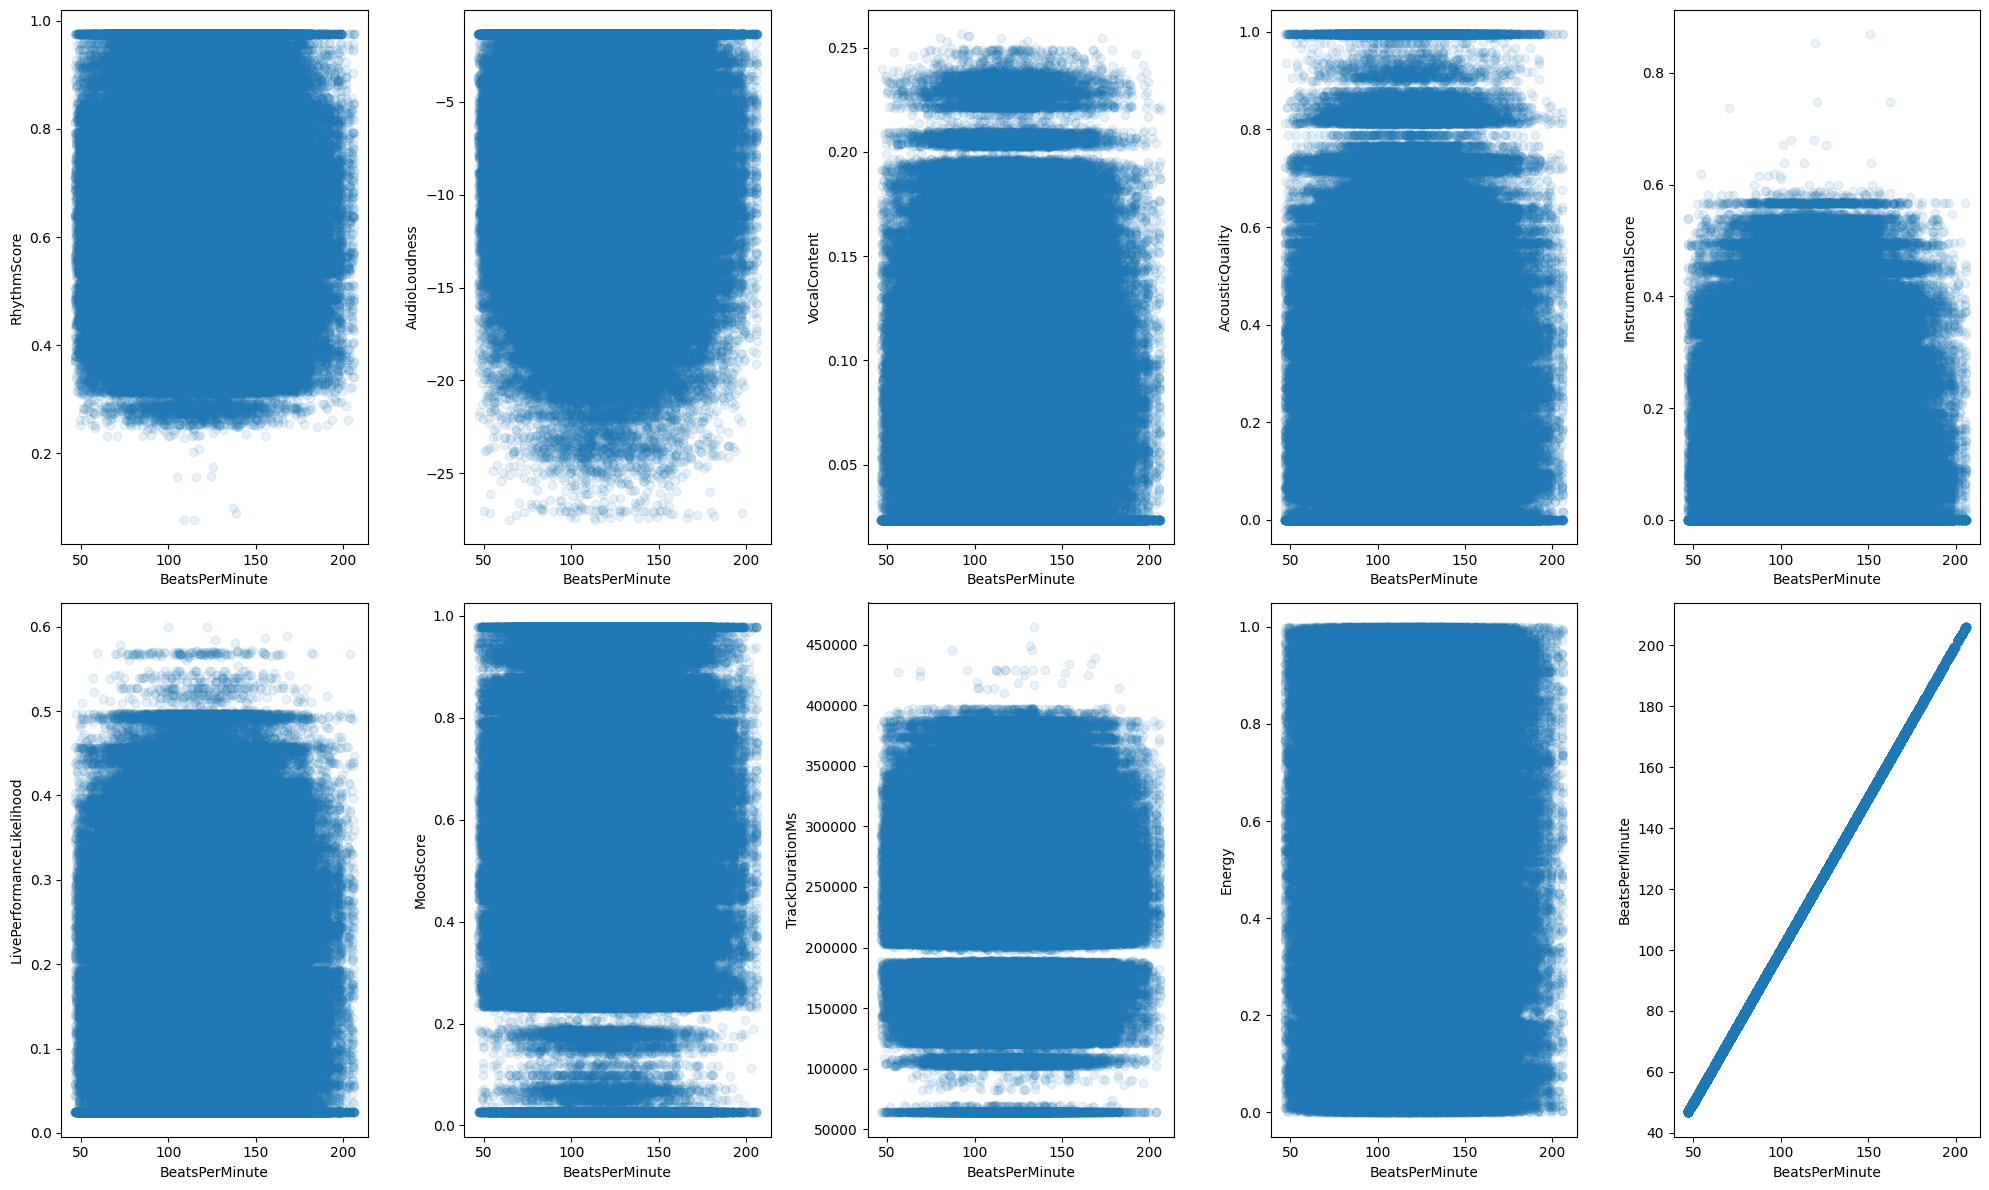

In [4]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (20,12), layout = 'tight')
axes = axes.flatten()

for i, col in enumerate(explore.columns.drop('id')):
    
    ax = axes[i]
    ax.scatter(explore['BeatsPerMinute'], explore[col], alpha = 0.1)
    ax.set_xlabel('BeatsPerMinute')
    ax.set_ylabel(col)

plt.show()

### No obvious relationship from the plots
### The Data needs scaling before training as there is different scales for each feature

### Building & Training the model
#### We split the Dataset to training and testing sets to properly evaluate our model on unseen data
#### To ensure a high performance we, we will scale the feature so they are all on a similar scale
#### Based on EDA finding of non-linear relationships, I will use a RandomForestRegressor to train the model

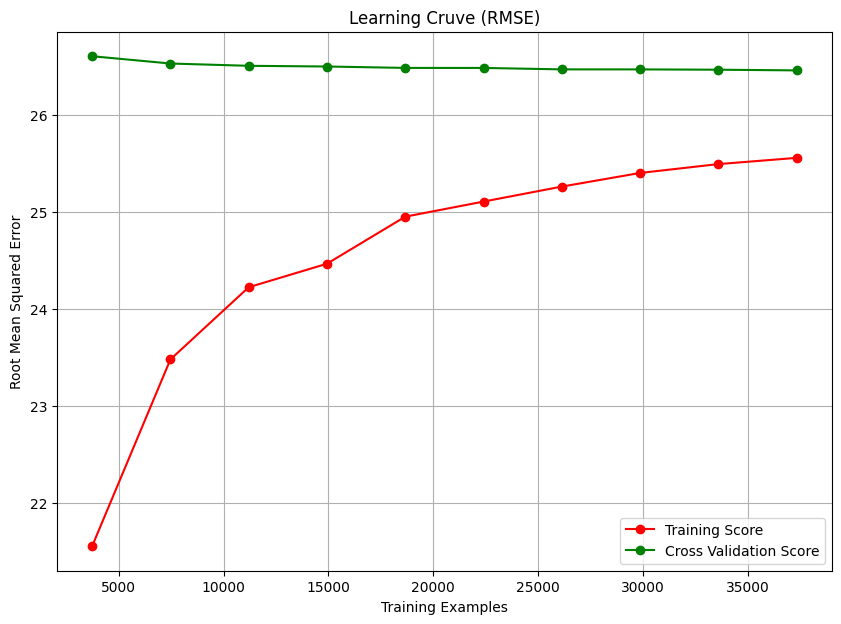

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler


X = train_data.drop(["BeatsPerMinute"], axis = 1)
y = train_data["BeatsPerMinute"]
X = X[:70000]
y = y[:70000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

model = make_pipeline(StandardScaler(),RandomForestRegressor(max_depth = 10, random_state = 23))

train_size, train_score, test_score = learning_curve(
    estimator=model,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 3,
    scoring = "neg_mean_squared_error",
    n_jobs = -1
)

train_rmse_score = np.sqrt(-train_score)
test_rmse_score = np.sqrt(-test_score)

train_mean_rmse = np.mean(train_rmse_score, axis = 1)
test_mean_rmse = np.mean(test_rmse_score, axis = 1)

plt.figure(figsize = (10,7))
plt.title("Learning Cruve (RMSE)")
plt.xlabel("Training Examples")
plt.ylabel("Root Mean Squared Error")
plt.grid()

plt.plot(train_size, train_mean_rmse, 'o-', color = 'r', label = 'Training Score')
plt.plot(train_size, test_mean_rmse, 'o-', color = 'g', label = 'Cross Validation Score')

plt.legend(loc = "best")
plt.show()

In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(test_data)

output = pd.DataFrame({'id': test_data['id'], "BeatsPerMinute": y_pred})

output.to_csv("submission.csv", index = False)